Objective is to predict what is the fare of the ticket given all the features we have i.e. destination, source, journey etc. 



In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
train_data = pd.read_excel('Data_Train.xlsx')

In [3]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


Lets deal with missing values, since there are very few missing values we can simply delete these. A high number of missing values, it may be advantageous to impute (replace missing values with the average value for that particular set)

In [5]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
train_data.shape

(10683, 11)

In [7]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [8]:
train_data.dropna(inplace=True)

In [9]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

The next step is to pre process & perform featurisation on 'Date_of_journey"

Featurisation - extracting feature that can be undertood by ML algo. For instance, the algo wont understand date of journey in its current form so this must be changed. 

Date of Jouney, arrival time departure time and duration needs to be changed into a timestamp

In [10]:
data = train_data.copy()

In [11]:
def change_into_datetime(col):
   data[col]= pd.to_datetime(data[col])
pass


In [12]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [13]:
for feature in ['Date_of_Journey', 'Dep_Time', 'Arrival_Time']:
    change_into_datetime(feature)

/home/zain/miniconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '24/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/home/zain/miniconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '24/06/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/home/zain/miniconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '27/05/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/home/zain/miniconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '18/04/2019' in DD/MM/YYYY form

In [14]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [15]:
data['journey_day']=data['Date_of_Journey'].dt.day

In [16]:
data['journey_month'] = data['Date_of_Journey'].dt.month

In [17]:
data['journey_year'] = data['Date_of_Journey'].dt.year

In [18]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-07-18 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-07-18 05:50:00,2022-07-18 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019


In [19]:
data.drop('Date_of_Journey', axis=1, inplace = True)

In [20]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-07-18 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-07-18 05:50:00,2022-07-18 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-07-18 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-07-18 18:05:00,2022-07-18 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-07-18 16:50:00,2022-07-18 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019


Date of Journey has now been cleaned, split into journey day month and year in a way that the ML algo can understand. Now we should clean Dep_Time and Arrival_time and featurise it. 

The date part of departure time is no longer needed, since it is covered in the journey_day_month_year. 

Only need to worry about hour and min. Need a function, where you pass a column, returns the hour and the min of any row. 
Other approaches are map approaches, lambda function for loops. 

In [21]:
def extract_hour_min(df, col):
    df[col+'_hour'] = df[col].dt.hour
    df[col+'_minute']=df[col].dt.minute
    df.drop(col, axis=1, inplace=True)
    return df.head(2)


In [22]:
extract_hour_min(data, 'Dep_Time')

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-07-18 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50


In [23]:
extract_hour_min(data, 'Arrival_Time')

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15


 Now it is time to analyse the data and create visualizations. I.e. look at the amount of flights that took place at morning vs night. 

 if 0-4 hour dept time it is a light night, 4-8 early morning, 8-12 morning, 12-16 noon, 16-20 evening, 20-24 night. 
 

 Can be done using if,elif, else. 

 

In [24]:
def flight_dep_time(x):
    if (x> 4) and (x<=8):
        return 'Early Morning'
    elif (x>8) and (x<=12):
        return 'Morning'
    elif (x>12) and (x<=16):
        return 'Noon'
    elif (x>16) and (x<=20):
        return 'Evening'
    elif (x>20) and (x<=24):
        return 'Night'
    else:
        return 'Late Night'

In [25]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts()

Early Morning    2880
Evening          2357
Morning          2209
Noon             1731
Night            1040
Late Night        465
Name: Dep_Time_hour, dtype: int64

<AxesSubplot:>

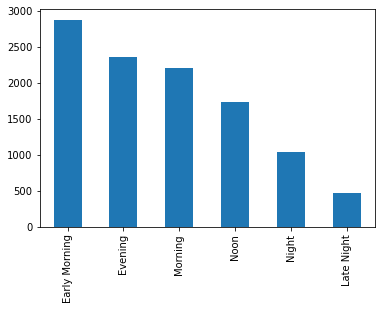

In [26]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind='bar')


Using Plotly and Cufflinks to make the plot more interactive

In [27]:
import plotly 
import cufflinks as cf 
from cufflinks.offline import go_offline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [28]:
cf.go_offline()

In [29]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind='bar')

Next step is to pre process Duration Feature, and extract meaningful features. Machine learning model will not understand the data in its current form. A function must be coded to clean the duration. 

Some flights are two days, if we convert to mins these will become outlyers. best to keep data in a way that there are no outlyers.


In [30]:
data.head(10)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,24,6,2019,9,0,11,25
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,3,12,2019,18,55,10,25
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,3,1,2019,8,0,5,5
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,3,12,2019,8,55,10,25
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,7h 50m,1 stop,No info,8625,27,5,2019,11,25,19,15


In [31]:
def preproccess_duration(x):
    if 'h' not in x:
        x= '0h '+ x
    elif 'm' not in x:
        x=x+ ' 0m'
    return x 

data['Duration'].apply(preproccess_duration)

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [32]:
data['Duration']= data['Duration'].apply(preproccess_duration)

In [33]:
int(data['Duration'][0].split(' ')[0][0:-1])

2

In [34]:
data['Duration'][0].split(' ')[1][0:-1]

'50'

In [35]:
data['Duration'].apply(lambda x:int(x.split(' ')[0][0:-1]))

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: Duration, Length: 10682, dtype: int64

In [36]:
data['Duration'].apply(lambda x:int(x.split(' ')[1][0:-1]))

0        50
1        25
2         0
3        25
4        45
         ..
10678    30
10679    35
10680     0
10681    40
10682    20
Name: Duration, Length: 10682, dtype: int64

In [37]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35


In [38]:
data['Duration_total_mins']=data['Duration'].str.replace('h','*60').str.replace(' ', '+').str.replace('m', '*1').apply(eval)

In [39]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,445


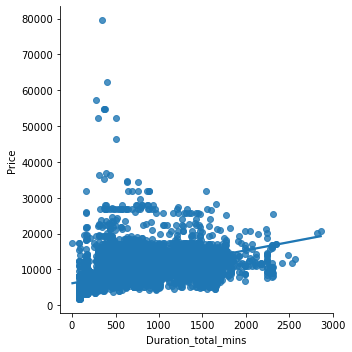

In [40]:
sns.lmplot(
    x='Duration_total_mins',
    y= 'Price',
    data=data,
)

In [41]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

<AxesSubplot:>

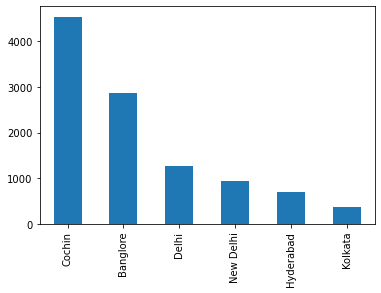

In [42]:
data['Destination'].value_counts().plot(kind = 'bar')

<AxesSubplot:ylabel='Destination'>

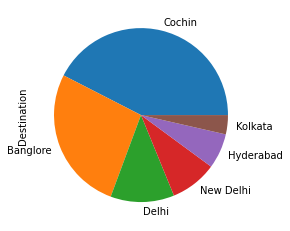

In [43]:
data['Destination'].value_counts().plot(kind = 'pie')

Which route is Jet Airways used a lot ? 

In [44]:
data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [45]:
data['Airline']

0             IndiGo
1          Air India
2        Jet Airways
3             IndiGo
4             IndiGo
            ...     
10678       Air Asia
10679      Air India
10680    Jet Airways
10681        Vistara
10682      Air India
Name: Airline, Length: 10682, dtype: object

In [46]:
data['Airline']==' Jet Airways'

0        False
1        False
2        False
3        False
4        False
         ...  
10678    False
10679    False
10680    False
10681    False
10682    False
Name: Airline, Length: 10682, dtype: bool

In [47]:
data[data['Airline']=='Jet Airways']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_total_mins
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,1140
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,3,12,2019,18,55,10,25,930
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,3,1,2019,8,0,5,5,1265
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,3,12,2019,8,55,10,25,1530
13,Jet Airways,Kolkata,Banglore,CCU → BOM → BLR,12h 10m,1 stop,In-flight meal not included,9663,5,9,2019,21,10,9,20,730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10668,Jet Airways,Delhi,Cochin,DEL → JDH → BOM → COK,7h 20m,2 stops,No info,21219,5,9,2019,11,40,19,0,440
10672,Jet Airways,Delhi,Cochin,DEL → AMD → BOM → COK,19h 55m,2 stops,In-flight meal not included,11150,27,6,2019,23,5,19,0,1195
10673,Jet Airways,Delhi,Cochin,DEL → AMD → BOM → COK,15h 0m,2 stops,No info,16704,27,5,2019,13,25,4,25,900
10674,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,24h 45m,1 stop,In-flight meal not included,11087,3,12,2019,20,35,21,20,1485


In [48]:
data[data['Airline']=='Jet Airways'].groupby('Route').size()

Route
BLR → BDQ → DEL            8
BLR → BOM → DEL          385
BLR → BOM → JDH → DEL      3
BLR → DEL                382
BLR → MAA → DEL           10
BOM → BDQ → DEL → HYD      2
BOM → DED → DEL → HYD      1
BOM → DEL → HYD            5
BOM → HYD                207
BOM → IDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → VNS → DEL → HYD      1
CCU → BOM → BLR          930
CCU → BOM → PNQ → BLR      4
CCU → DEL → BLR          300
CCU → GAU → BLR           22
DEL → AMD → BOM → COK    141
DEL → ATQ → BOM → COK     38
DEL → BDQ → BOM → COK     28
DEL → BHO → BOM → COK     29
DEL → BOM → COK          875
DEL → CCU → BOM → COK      1
DEL → COK                 34
DEL → DED → BOM → COK      2
DEL → IDR → BOM → COK     86
DEL → IXC → BOM → COK     13
DEL → JAI → BOM → COK    207
DEL → JDH → BOM → COK     23
DEL → LKO → BOM → COK     25
DEL → MAA → BOM → COK     16
DEL → NAG → BOM → COK     61
DEL → UDR → BOM → COK      7
dtype: int64

In [49]:
data[data['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

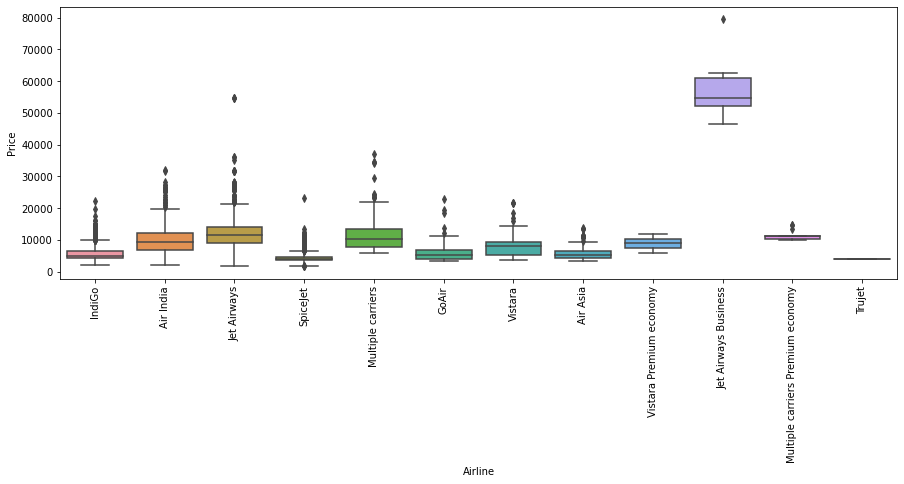

In [50]:
plt.figure(figsize=(15,5))
sns.boxplot(data= data, y = 'Price', x='Airline')
plt.xticks(rotation='vertical')

In [51]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35,285


In [52]:
data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [53]:
np.round(data['Additional_Info'].value_counts()/len(data)*100,2)

No info                         78.11
In-flight meal not included     18.55
No check-in baggage included     3.00
1 Long layover                   0.18
Change airports                  0.07
Business class                   0.04
No Info                          0.03
1 Short layover                  0.01
Red-eye flight                   0.01
2 Long layover                   0.01
Name: Additional_Info, dtype: float64

78% of the time there is no additional information provided. Hence we can drop this feature. 

In [54]:
data.drop(columns=['Additional_Info', 'Route', 'Duration_total_mins', 'journey_year'], axis = 1, inplace = True)

In [55]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops', 'Price',
       'journey_day', 'journey_month', 'Dep_Time_hour', 'Dep_Time_minute',
       'Arrival_Time_hour', 'Arrival_Time_minute'],
      dtype='object')

In [56]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,3,1,16,50,21,35


We need to use feature encoding techniques to make the computer understand catagorical data. Rule of thumb is if data belongs to ordinal categories, we can use label encoder. 

Ordinal data, nominal data you can use one hot. I.e. F1, F2, F3 0,1,0. F1 is Delhi, F2 is Mumbai. 

In [57]:
cat_col= [col for col in data.columns if data[col].dtype == 'object']

In [58]:
num_col= [col for col in data.columns if data[col].dtype != 'object']

In [59]:
cat_col

['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops']

In [60]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [61]:
data['Source'].apply(lambda x: 1 if x=='Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [62]:
for category in data['Source'].unique():
    data['Source'+ category]=data['Source'].apply(lambda x: 1 if x==category else 0)

In [63]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,1,0,0,0,0
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,0,1,0,0,0
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,6,9,9,25,4,25,0,0,1,0,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,18,5,23,30,0,1,0,0,0
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,3,1,16,50,21,35,1,0,0,0,0


Perform targer guided encoding on Data, perform Manuel Encoding on Data. I.e. if you have one thousdand cities, it will create 999 extra featuers, therefore ML algo will not be able to understand. Curse of dimensionality, this will take up too many resources. 




In [64]:
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index

In [65]:
dict1 = {key:index for index,key in enumerate(airlines,0)}

In [66]:
dict1

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

Now lets map this dictionary on top of the airlines 

In [67]:
data['Airline'] = data['Airline'].map(dict1)

In [68]:
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [69]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,3,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,1,0,0,0,0
1,7,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,0,1,0,0,0


In [70]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

Lets consider New Delhi and Delhi as the same.

In [71]:
data['Destination'].replace('New Delhi','Delhi', inplace=True )

In [72]:
dest = data.groupby(['Destination'])['Price'].mean().sort_values().index

In [73]:
dict2 = {key:index for index,key in enumerate(dest,0)}

In [74]:
dict2

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [75]:
data['Destination'] = data['Destination'].map(dict2)

In [76]:
data['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [77]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,3,Banglore,2,2h 50m,non-stop,3897,24,3,22,20,1,10,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2 stops,7662,5,1,5,50,13,15,0,1,0,0,0
2,10,Delhi,4,19h 0m,2 stops,13882,6,9,9,25,4,25,0,0,1,0,0
3,3,Kolkata,3,5h 25m,1 stop,6218,5,12,18,5,23,30,0,1,0,0,0
4,3,Banglore,2,4h 45m,1 stop,13302,3,1,16,50,21,35,1,0,0,0,0


Total stops need to be encoded as well. This can be done manually, replace nonstop with 0, 1 stop with 1, etc. A dictionary named stops is created and values are manually assigned stop. This is then maped to total stops

In [78]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [79]:
stops = {
    'non-stop':0,
    '2 stops':2,
    '1 stop':1,
    '3 stops':3,
    '4 stops':4
    }

In [80]:
data['Total_Stops']= data['Total_Stops'].map(stops)

In [81]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,3,Banglore,2,2h 50m,0,3897,24,3,22,20,1,10,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2,7662,5,1,5,50,13,15,0,1,0,0,0
2,10,Delhi,4,19h 0m,2,13882,6,9,9,25,4,25,0,0,1,0,0
3,3,Kolkata,3,5h 25m,1,6218,5,12,18,5,23,30,0,1,0,0,0
4,3,Banglore,2,4h 45m,1,13302,3,1,16,50,21,35,1,0,0,0,0


Now we need to perform outlier detection, and decide how to deal with outlier. 

1. Detect outlier
2. Deal with outlier 

A good way to detect is to plot the distribution of data, histogram, boxplot.

In this case it seems prices above 35k are outliers, and it is best to replace these values with the Median. This is since the median is less affected by outliers than the mean. 

2,8,4,6,3,7 -> Mean is 5, Median is 5
2,8,4,6,3,7,1000 -> Mean is 147,Median is 5



In [82]:
def plot(df,col):
    fig,(ax1,ax2,ax3) = plt.subplots(3,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col], ax=ax2)
    sns.distplot(df[col],ax=ax3, kde=False)

/home/zain/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/home/zain/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/home/zain/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



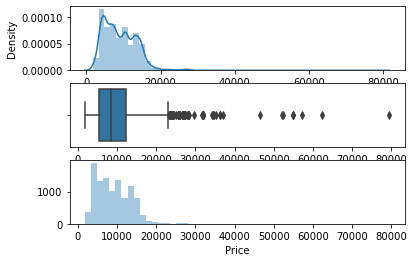

In [83]:
plot(data,'Price')

In [84]:
data['Price']=np.where(data['Price']>=35000,data['Price'].median(),data['Price'])

/home/zain/miniconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/home/zain/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



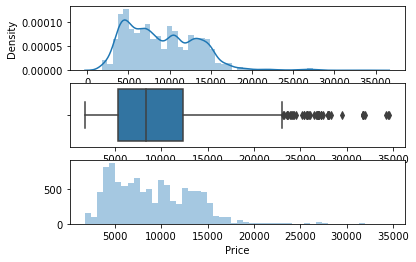

In [85]:
plot(data,'Price')

Feature Selection -> All about finding the best features which have a good relation, which will contribute most to target feature(predicting what is the fare of a flight)

Source, and duration have already been featurised. So they should be removed. We must check what is the type of all the data, should be integer or float so ML algo can understand.


In [86]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,3,Banglore,2,2h 50m,0,3897.0,24,3,22,20,1,10,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2,7662.0,5,1,5,50,13,15,0,1,0,0,0


In [87]:
data.drop(columns=['Source','Duration'], axis=1, inplace=True)

In [88]:
data.head(2)

,Airline,Destination,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,SourceBanglore,SourceKolkata,SourceDelhi,SourceChennai,SourceMumbai
0,3,2,0,3897.0,24,3,22,20,1,10,1,0,0,0,0
1,7,3,2,7662.0,5,1,5,50,13,15,0,1,0,0,0


In [89]:
data.dtypes

Airline                  int64
Destination              int64
Total_Stops              int64
Price                  float64
journey_day              int64
journey_month            int64
Dep_Time_hour            int64
Dep_Time_minute          int64
Arrival_Time_hour        int64
Arrival_Time_minute      int64
SourceBanglore           int64
SourceKolkata            int64
SourceDelhi              int64
SourceChennai            int64
SourceMumbai             int64
dtype: object


Core function, f regression mutual information regression. 
Price is dependent feature X, independent features are y, we are trying to find which independent features most correlate to price change. 

Mutual information between two random Variable is typically a non negative value that measures dependancy between two variables. 

0 - two variables are independent

In [90]:
from sklearn.feature_selection import mutual_info_regression

In [91]:
X = data.drop(['Price'],axis = 1)

In [92]:
y=data['Price']

In [93]:
X.dtypes

Airline                int64
Destination            int64
Total_Stops            int64
journey_day            int64
journey_month          int64
Dep_Time_hour          int64
Dep_Time_minute        int64
Arrival_Time_hour      int64
Arrival_Time_minute    int64
SourceBanglore         int64
SourceKolkata          int64
SourceDelhi            int64
SourceChennai          int64
SourceMumbai           int64
dtype: object

In [94]:
mutual_info_regression(X,y)

array([0.98684902, 1.00169188, 0.79611204, 0.1946525 , 0.23363007,
       0.3369211 , 0.25203669, 0.40613209, 0.34814914, 0.38889622,
       0.45482788, 0.52098102, 0.1225366 , 0.20572295])

In [95]:
imp = pd.DataFrame(mutual_info_regression(X,y), index=X.columns)

In [96]:
imp
imp.columns=['Importance']

imp.sort_values(by='Importance', ascending=False)

,Importance
Destination,1.009472
Airline,0.980927
Total_Stops,0.787557
SourceDelhi,0.512062
SourceKolkata,0.453069
SourceBanglore,0.393827
Arrival_Time_hour,0.393746
Arrival_Time_minute,0.348667
Dep_Time_hour,0.340315
Dep_Time_minute,0.264472


Random Forest Algo, and now building the ML model. We need training data, so machine learning algo can understand data, testing data to understand how well machine learning model is performing. 

75/25 Training and Testing. 

In [97]:
from sklearn.model_selection import train_test_split


In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [99]:
from sklearn.ensemble import RandomForestRegressor

ml_model = RandomForestRegressor()

model= ml_model.fit(X_train, y_train)

y_pred =model.predict(X_test)

In [100]:
y_pred

array([16791.98,  6208.97,  8965.88, ...,  3497.64,  6310.63,  6821.63])

Model is saved as a pickle file.

In [101]:
import pickle

file = open('rf_random.pkl','wb' )

pickle.dump(model,file)

In [102]:
model = open('rf_random.pkl', 'rb')

In [103]:
forest = pickle.load(model)

In [104]:
forest.predict(X_test)

array([16791.98,  6208.97,  8965.88, ...,  3497.64,  6310.63,  6821.63])

We need to define our Evaluation Metric, to figure out how well the ML model is performing. MAPE mean absolute potential error. 

Define MAPE from scratch. Model Predication - Actual Value.

We must also automate ML model. Right now we have a function that must be called. 

Training Score
Prediction

MAE
MAPE
RMSL
MSS


In [105]:
from tkinter import Y


def mape(y_true, y_pred):
    y_true,y_pred = np.array(y_true),np.array(y_pred)

    return np.mean(np.abs((y_true-y_pred)/(y_true)))*100

In [106]:
mape(y_test,forest.predict(X_test))

13.010490250537968

In [ ]:
def predict(ml_model):
   model= ml_model.fit(X_train, y_train)
   print('Training_score:{}'.format(model.score(X_train, y_train)))
   y_prediction = model.predict(X_test)
   print('Predictions are : {}'.format(y_prediction))

   from sklearn import metrics

   r2_score = metrics.r2_score(y_test,y_prediction)
   print('r2_score:{}'.format())